<a href="https://colab.research.google.com/github/smaciasg/Ejercicios_DataScience_Coding_Dojo/blob/main/M%C3%A9trica_de_clasificaci%C3%B3n_(pr%C3%A1ctica)_Campa%C3%B1a_banco_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizaremos este conjunto de datos. Los datos, que se modificaron de este recurso, tienen información sobre las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. El objetivo es predecir si el cliente se suscribirá (sí: 1 o no: 0) a un depósito a plazo (la columna objetivo se llama “y_yes” en este CSV).

La tarea es crear un modelo de regresión logística para predecir si el cliente se suscribirá o no. Afinen los hiperparámetros para obtener el mejor modelo posible. Luego, calculen la siguiente métrica de clasificación:

Métrica a calcular:

1.Exactitud

2.Sensibilidad

3.Especificidad

4.AUC ROC

5.Además, tracen el ROC.

**Preguntas para pensar y responder**

1.Después de terminar la tarea, respondan las siguientes preguntas:

2.¿Qué métrica va a ser la mejor para evaluar el modelo de clasificación para este conjunto de datos y por qué? Pista: piensen en lo que cada métrica significa en este caso específico. ¿Cuál métrica ayudará más al banco?
Comparen la exactitud del modelo con el modelo de referencia. ¿Ven algún problema?

3.¿De qué otras formas se puede mejorar este modelo?

##**1) Importar las librerías necesarias**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Librerías para preprocesamiento
import sklearn
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
#Librerías para modelos de selección
from sklearn.model_selection import train_test_split
#Librería para el modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#Librería para las métricas
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score,RocCurveDisplay
from sklearn.metrics import classification_report, plot_confusion_matrix
#Para optimizar
from sklearn.model_selection import GridSearchCV

###**2) Cargar datos y explorar**

In [84]:
bank = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/ACTIVIDADES SEMANA 7 - MODELOS DE PREDICCIÓN CLASIFICACIÓN/bank_modified.csv')
bank.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [85]:
bank.info()
#Ninguna columna con datos nulos.
#Todas las columnas son del mismo tipo.
#Se deben escalar los valores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

###**3) Crear matriz de características y vector objetivo**

In [86]:
X = bank.drop(columns='y_yes')
y = bank['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [87]:
y.value_counts()
#Se va a tratar de una clasificación mbinaria pero está muy desbalanceada por lo que es probable que el modelo tenga un buen rendimiento en el conjunto de pruebas

0    4000
1     521
Name: y_yes, dtype: int64

###**4) Instanciar el transformador, modelo, pipeline**

**Instancia para el escalador**

In [88]:
scaler = StandardScaler()

**Instancia para el modelo re regresión logística**

In [89]:
log_reg_bank = LogisticRegression(random_state=42)

**Instancia para pipeline**

In [90]:
log_reg_pipe = make_pipeline(scaler,log_reg_bank)

###**5) Ajustar modelo a los datos de entrenamiento**

In [91]:
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

###**6) Calcular las predicciones**

In [92]:
log_reg_predic = log_reg_pipe.predict(X_test)
log_reg_predic

array([0, 0, 0, ..., 0, 0, 0])

###**7) Métricas para el modelo**

**Exactitud - Accuracy**

In [93]:
accuracy = log_reg_pipe.score(X_test,y_test)
accuracy

0.8992042440318302

**Otras métricas**

In [94]:
print(f'recall = {recall_score(y_test,log_reg_predic)}')
print(f'precision = {precision_score(y_test,log_reg_predic)}')

recall = 0.272
precision = 0.5964912280701754


In [95]:
print(classification_report(y_test,log_reg_predic))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1006
           1       0.60      0.27      0.37       125

    accuracy                           0.90      1131
   macro avg       0.76      0.62      0.66      1131
weighted avg       0.88      0.90      0.88      1131



**AUC ROC**

In [96]:
# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, log_reg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, log_reg_pipe.predict_proba(X_test)[:,1])}')

Training AUC: 0.8615859665458865
Testing AUC: 0.8588548707753478


**Curva AUC_ROC**

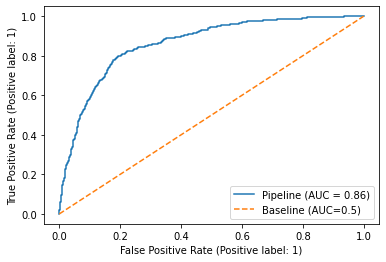

In [109]:
RocCurveDisplay.from_estimator(log_reg_pipe,X_train,y_train)
plt.plot([0,1],[0,1],ls='--', label='Baseline (AUC=0.5)')
plt.legend()

**Matriz de confusión**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


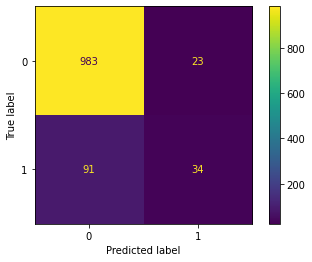

In [97]:
plot_confusion_matrix(log_reg_pipe,X_test,y_test)

Dado que nuestro objetivo es poder clasificar el 1 lo mejor posible, se observa que hay gran error tipo 2 ya que se está prediciendo 0 cuando deberías ser 1, un falso negativo, así que para reducir el falso negativo, queremos que el recall sea el máximo

###**8) Optimización parámetro C**

**Usando regularización l1**

In [98]:
#Crear lista de posibles valores c
lista_c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
lista_test_score = []
for c in lista_c: 
  log_reg_opti = LogisticRegression(C=c, solver='liblinear', max_iter=1000, penalty='l1', random_state=42)
  log_reg_opti_pipe = make_pipeline(scaler,log_reg_opti)
  log_reg_opti_pipe.fit(X_train, y_train)
  log_reg_opti_pred = log_reg_opti_pipe.predict(X_test)
  lista_test_score.append(recall_score(y_test,log_reg_opti_pred))

dic_l1={score:c for c,score in zip(lista_c,lista_test_score)}

In [99]:
{c:score for c,score in zip(lista_c,lista_test_score)}

{0.0001: 0.0,
 0.001: 0.0,
 0.01: 0.112,
 0.1: 0.224,
 1: 0.264,
 10: 0.272,
 100: 0.272,
 1000: 0.272}

**Usando regularización l2**

In [100]:
#Crear lista de posibles valores c
lista_c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
lista_train_score = []
lista_test_score = []
for c in lista_c: 
  log_reg_opti = LogisticRegression(C=c, solver='liblinear', max_iter=1000, penalty='l2', random_state=42)
  log_reg_opti_pipe = make_pipeline(scaler,log_reg_opti)
  log_reg_opti_pipe.fit(X_train, y_train)
  lista_train_score.append(log_reg_opti_pipe.score(X_train,y_train))
  lista_test_score.append(log_reg_opti_pipe.score(X_test,y_test))

dic_l2={score:c for c,score in zip(lista_c,lista_test_score)}

In [101]:
dic_l2.get(max(lista_test_score))

1

In [102]:
#Diccionario para ver los valores de c y los score
{c:score for c,score in zip(lista_c,lista_test_score)}

{0.0001: 0.8956675508399646,
 0.001: 0.8947833775419982,
 0.01: 0.8956675508399646,
 0.1: 0.8983200707338639,
 1: 0.8992042440318302,
 10: 0.8983200707338639,
 100: 0.8983200707338639,
 1000: 0.8983200707338639}

**Cambio de los pesos**

Dado que el dataset está desbalanceado se espera que se puedan ajustar los pesos en un proporción contraria a la que representan

In [103]:
y.value_counts(normalize=True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

**Usar Grid para optimizar**

In [141]:
w = [{0:10,1:100},{0:10,1:99}, {0:10,1:90}, 
     {0:20,1:80}, {0:20,1:100}, {0:5,1:100}, {0:5,1:95}, 
     {0:12,1:88}, {0:15,1:85}, {0:12,1:100}, {0:11,1:90}]

hyperparam_grid = {"class_weight": w }

**Se usa GridSearch y se asigna el score que se pretende mejorar que es roc_auc**

In [142]:
# define model
lg3 = LogisticRegression(random_state=42)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.8508314176245212 with param: {'class_weight': {0: 10, 1: 90}}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [165]:
#Los pesos quedarán así
#Se prueba con 'class_weight': {0: 10, 1:90} y el accuracy baja al 78%, y el auc_roc no varía en unidades porcentuales, en la centécimas, así que para no penalizar mucho los 
# demás indicadores se toma un w según la distribución del data set observada 
w = {0:12,1:88}
log_reg_opti = LogisticRegression(class_weight=w, random_state=42, max_iter=1000, solver='liblinear', C=1, penalty='l2')
log_reg_opti_pipe = make_pipeline(scaler,log_reg_opti)
log_reg_opti_pipe.fit(X_train, y_train)
log_reg_opti_pred = log_reg_opti_pipe.predict(X_test)
recall = recall_score(y_test,log_reg_opti_pred)
recall

0.72

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


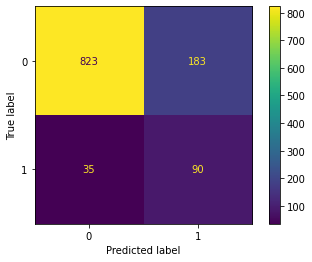

In [166]:
plot_confusion_matrix(log_reg_opti_pipe,X_test,y_test)

In [167]:
print(classification_report(y_test,log_reg_opti_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1006
           1       0.33      0.72      0.45       125

    accuracy                           0.81      1131
   macro avg       0.64      0.77      0.67      1131
weighted avg       0.89      0.81      0.84      1131



In [168]:
# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, log_reg_opti_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, log_reg_opti_pipe.predict_proba(X_test)[:,1])}')

Training AUC: 0.8659963023690479
Testing AUC: 0.8631013916500994


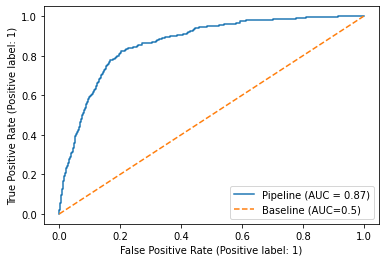

In [169]:
RocCurveDisplay.from_estimator(log_reg_opti_pipe,X_train,y_train)
plt.plot([0,1],[0,1],ls='--', label='Baseline (AUC=0.5)')
plt.legend()